<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [2]:
#ваш код здесь

#разделитель - точка с запятой. укажем его в параметрах загрузки в df
df = pd.read_csv('.\data\dst-3.0_16_1_hh_database.csv', sep=';')

#заодно и курсы здесь можно загрузить
df_rates = pd.read_csv('.\data\ExchangeRates.csv')

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [3]:
#ваш код здесь
display(df.head(5))

#Задание 2.1. Чему равна размерность таблицы? Введите её в виде кортежа (число строк, число столбцов).
print('Задание 2.1:', df.shape)

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано
3,"Мужчина , 38 лет , родился 25 июня 1980",100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,Высшее образование 2002 Саратовский государст...,08.04.2019 14:23,Не указано
4,"Женщина , 26 лет , родилась 3 марта 1993",140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,Высшее образование 2015 Кгу Психологии и педаг...,22.04.2019 10:32,Не указано


Задание 2.1: (44744, 12)


3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

4. Обратите внимание на информацию о числе непустых значений.

In [4]:
#ваш код здесь

#Задание 2.3. Какой тип данных имеют все столбцы? Введите его в поле для ответа.
print('Задание 2.3:', df.dtypes[0])

#вывод столбцов с пустыми значениями с указанием номера задания в красивый список без скобочек
cols_with_empty = []

for col_name in df.columns:
    if df[col_name].isnull().sum() > 0:
        cols_with_empty.append(col_name)

#Задание 2.4. Обратите внимание на информацию о числе непустых значений.
#Выберите все признаки, в которых есть пропуски в данных:
print('Задание 2.4:', ', '.join(cols_with_empty))

print(df.info())

Задание 2.3: object
Задание 2.4: Опыт работы, Последнее/нынешнее место работы, Последняя/нынешняя должность
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-nul

5. Выведите основную статистическую информацию о столбцах.


In [5]:
#ваш код здесь
#Задание 2.5. Выведите основную статистическую информацию о столбцах.
#Сколько уникальных значений содержится в столбце «Опыт работы»?
print('Задание 2.5:', df.describe()['Опыт работы'].loc['unique'])
print('Задание 2.5:', df.describe()['Последняя/нынешняя должность'].loc['top'])

print(df.describe())

Задание 2.5: 44413
Задание 2.5: Системный администратор
                                         Пол, возраст          ЗП  \
count                                           44744       44744   
unique                                          16003         690   
top     Мужчина ,  32 года , родился 17 сентября 1986  50000 руб.   
freq                                               18        4064   

       Ищет работу на должность:  \
count                      44744   
unique                     14929   
top      Системный администратор   
freq                        3099   

                             Город, переезд, командировки         Занятость  \
count                                               44744             44744   
unique                                              10063                38   
top     Москва , не готов к переезду , не готов к кома...  полная занятость   
freq                                                 1261             30026   

             График  

# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [6]:
#ваш код здесь
educ_list_check = {"высшее", "неоконченное высшее", "среднее специальное", "среднее"}

#выделение образования из строки:
#разбиение строки на слова по пробелам, взятие первых 2 слов. если второе слово - образование, то откидываем его
df['Образование'] = df['Образование и ВУЗ'].apply(
    lambda x: ' '.join(x.split(' ')[:2]).lower() if x.split(' ')[2] == 'образование' else x.split(' ')[0].lower()
    )

print(df['Образование'].unique())
#проверка, что значения в новом столбце совпадают с заданным списком значений
if set(df['Образование'].unique()).union(educ_list_check) == educ_list_check:
    print('значения столбца Образование соответствуют заданным')
else:
    print('значения столбца Образование НЕ соответствуют заданным')

#Задание 3.1. Сколько соискателей имеет средний уровень образования (школьное образование)?
print('Задание 3.1:', df[df['Образование'] == 'среднее'].shape[0])

#удаление столбца "Образование и ВУЗ"
df.drop("Образование и ВУЗ", axis=1, inplace=True)

['неоконченное высшее' 'высшее' 'среднее специальное' 'среднее']
значения столбца Образование соответствуют заданным
Задание 3.1: 559


2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [7]:
#ваш код здесь

#пол -  первый символ строки в поле "Пол, возраст"
df['Пол'] = df['Пол, возраст'].apply(lambda x: x[0])

#возраст = третье "слово" (обособленное пробелами множество символов)
#На позиции третьего слова стоит символ, обознаваемый через encode как b''.
#Поэтому надо брать индекс 3
df['Возраст'] = df['Пол, возраст'].apply(lambda x: int(x.split(' ')[3]))

#Задание 3.2. Сколько процентов женских резюме представлено в наших данных? Ответ округлите до сотых.
print('Задание 3.2:', round(df[df['Пол'] == 'Ж'].shape[0] / df.shape[0] * 100, 2))

#Чему равен средний возраст соискателей? Ответ округлите до десятых.
print('Задание 3.2', round(df['Возраст'].mean(), 1))

df.drop('Пол, возраст', axis=1, inplace=True)

Задание 3.2: 19.07
Задание 3.2 32.2


3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [8]:
#ваш код здесь

def experience_calc(exp_str):
    '''Функция расчета стажа по количеству лет и месяцев.
    Общий алгоритм:
    - вначале обрабатываются пропуски - по значению (nan) и по смыслу ("не заполнено").
    - затем проверяются 4 и 6 слово строки - там могут быть слова, связанные с годами и месяцами:
        - если на 4 позиции - слово, связанное с месяцами, то берем 3 слово - это стаж в месяцах, а лет нет;
        - если на 4 позиции - слово, связанное с годами, то берем 3 слово - это стаж в годах, и надо проверить 6 слово:
            - если на 6 позиции - слово, связанное с месяцами, то берем 5 слово - это стаж в месяцах;
            - если на 6 позиции - слово, не связанное с месяцами, то месяцев нет, и надо поставить 0 переменной месяцев/
        Далее вычисляется стаж = годы*12 + месяцы
    
    Args:
        exp_str - строка, в которой есть данные о стаже (сокращение от experience string)
        
    Returns:
        стаж в месяцах
    '''
    #какие слова означают срок в годах
    year_word_list = ('год', 'года', 'лет')
    
    #какие слова означают срок в месяцах
    month_word_list = ('месяц', 'месяца', 'месяцев')
    
    #изначальные пропуски данных
    if exp_str is np.nan:
        return np.nan
    
    #если указано текстом "Не указано"
    elif str(exp_str) == 'Не указано':
        return np.nan

    #общий алгоритм - проверка 4 и 6 позиций
    else:
        #если на 4 позиции - слово, связанное с месяцами, то на 3 позиции - количество месяцев, а лет нет
        if exp_str.split(' ')[3] in month_word_list:
            months = int(exp_str.split(' ')[2])
            years = 0
       #если на 4 позиции - слово, связанное с годами, то на 3 позиции - количество лет, и надо проверить 6 позицию
        elif exp_str.split(' ')[3] in year_word_list:
            years = int(exp_str.split(' ')[2])
            #проверка 6 позиции
            if exp_str.split(' ')[5] in month_word_list:
                months = int(exp_str.split(' ')[4])
            else:
                months = 0
        return int(years * 12 + months)

df['Опыт работы (месяц)'] = df['Опыт работы'].apply(experience_calc)

#Задание 3.3. Чему равен медианный опыт работы (в месяцах) в нашей таблице?
print('Задание 3.3:', int(df['Опыт работы (месяц)'].median()))

df.drop('Опыт работы', axis=1, inplace=True)

Задание 3.3: 100


4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [9]:
#ваш код здесь

def city_type(city_str):
    '''Функция определения типа города.
    Можно и в lambda-функцию вписать, но т.к. 4 условия, то нечитабельно будет.
    Городом является первое "слово" в строке 'Город, переезд, командировки', считая разделителемем запятую,
    а также не считая пробел перед запятой (в шаблоне <Город , (метро) , ...> пробел стоит)
    
    Args:
        city - поле, из которого надо извлечь город
    
    Returns:
        город / тип города по списку: "Москва", "Санкт-Петербург", "город-миллионник", "другие"
    '''

    #список миллионников
    million_cities = [
        'Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск',
        'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград'
        ]
    
    #выделение назавания города - первого "слова" до запятой без пробела перед ним
    city_str = city_str[:city_str.find(',') - 1]
    
    if city_str == 'Москва':
        return 'Москва'
    elif city_str == 'Санкт-Петербург':
        return 'Санкт-Петербург'
    elif city_str in million_cities:
        return 'город-миллионник'
    else:
        return 'другие'

df['Город'] = df['Город, переезд, командировки'].apply(city_type)

#список допустимых значений для города
city_check_list = {"Москва", "Санкт-Петербург", "город-миллионник", "другие"}

#проверка, что значения в новом столбце совпадают с заданным списком значений
if set(df['Город'].unique()).union(city_check_list) == city_check_list:
    print('значения столбца Город соответствуют заданным')
else:
    print('значения столбца Город НЕ соответствуют заданным')

#Задание 3.4. Сколько процентов соискателей живут в Санкт-Петербурге? Ответ округлите до целого.
#print(df['Город'].value_counts(normalize=True)) #можно и так, но это глазами искать
print('Задание 3.4:', round(100 * df[df['Город']=='Санкт-Петербург'].shape[0] / df.shape[0]))

#удаление информации о городе: взятие подстроки от символа после пробела после первой запятой, т.е. позиции запятой + 2
df['temp_data'] = df['Город, переезд, командировки'].apply(lambda x: x[x.find(',') + 2:])

#удаление информации о метро (при наличии метро):
#взятие подстроки от символа после пробела после первой запятой, если подстрока начинается с " м. "
df['temp_data'] = df['temp_data'].apply(lambda x: x[x.find(',') + 2:] if x.find(' м.') >= 0 else x)

#определение готовности к переезду:
#если оставшаяся строка начинается с "не", то не готов к переезду, иначе готов
df['Готовность к переезду'] = df['temp_data'].apply(lambda x: False if x[0:2] == 'не' else True)

#удаление информации о переезде:
#1. переворот строки: x[::-1]
#2. взятие перевернутой строки до пробела перед первой запятой: [0:x[::-1].find(',') - 1]
#3. и разворот строки обратно: [::-1]
#как только ни приходится крутиться без регулярных выражений...
df['temp_data'] = df['temp_data'].apply(lambda x: x[::-1][0:x[::-1].find(',') - 1][::-1])

#даже такое есть из низкочастотных:
#print(df[df['temp_data'] == 'готов к командир']) #непустой ответ получается

#определение гтовности к переезду:
#если есть "командир" - кусок слова "командировка" - и строка не начинается с "не", то готов, иначе не готов
df['Готовность к командировкам'] = df['temp_data'].apply(
    lambda x: True if x.find('командир') >= 0 and x[0:2] != 'не' else False
    )

#Задание 3.4 Сколько процентов соискателей готовы одновременно и к переездам, и к командировкам? Ответ округлите до целого.
print('Задание 3.4:',
      int(round(100 * df[(df['Готовность к переезду'] == True) & (df['Готовность к командировкам'] == True)].shape[0]
                / df.shape[0], 0)
         )
     )

df.drop(['temp_data', 'Город, переезд, командировки'], axis=1, inplace=True)

значения столбца Город соответствуют заданным
Задание 3.4: 11
Задание 3.4: 32


5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [10]:
#ваш код здесь
#словарь полей, по которым нужно создать новые поля, и кортежа полей, которые нужно создать по заданному полю
resume_dict = {'Занятость': ('полная занятость', 'частичная занятость', 'проектная работа', 'волонтерство', 'стажировка'),
               'График': ('полный день', 'сменный график', 'гибкий график', 'удаленная работа', 'вахтовый метод')
              }

def create_dummy_column(dict_in, delete_col=False):
    '''Функция создания переменных-мигалок из столбца по заданному списку
        
    Args:
        dict_in - словарь, на основании которого надо получить переменные-мигалки
        delete_col - флаг необходимости удаления столбца из исходной таблицы
    
    Returns:
        новые столбцы
    '''
    
    #проход по ключам словаря - получение столбца, из которого нужно получить столбцы-мигалки с True/False
    for var_name in dict_in.keys():
        print(var_name)
        #проход по значениям из кортежа для каждого ключа словаря
        for new_col_name in list(dict_in[var_name]):
            #создание столбца-мигалки и его заполнение значениями True/False
            df[new_col_name] = df[var_name].apply(lambda x: True if x.find(new_col_name)>=0 else False)
        
        if delete_col == True:
            df.drop(var_name, axis=1, inplace=True)
        
create_dummy_column(dict_in=resume_dict, delete_col=True)

#Задание 3.5. Сколько людей ищут проектную работу и волонтёрство (в обоих столбцах стоит True)?
print('Задание 3.5:', df[(df['проектная работа'] == True) & (df['волонтерство'] == True)].shape[0])

#Задание 3.5. Сколько людей хотят работать вахтовым методом и с гибким графиком (в обоих столбцах стоит True)?
print('Задание 3.5:', df[(df['вахтовый метод'] == True) & (df['гибкий график'] == True)].shape[0])

Занятость
График
Задание 3.5: 436
Задание 3.5: 2311


6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [11]:
#ваш код здесь
#перевод полей с датами в даты
df['Обновление резюме'] = pd.to_datetime(df['Обновление резюме']).dt.date
df_rates['date'] = pd.to_datetime(df_rates['date']).dt.date

#словарь валют
currency_dict = {'руб': 'RUB',
                 'KZT': 'KZT',
                 'USD': 'USD',
                 'белруб': 'BYN',
                 'EUR': 'EUR',
                 'грн': 'UAH',
                 'сум': 'UZS',
                 'KGS': 'KGS',
                 'AZN': 'AZN'}

#извлечения названия валюты (второе слово в поле 'ЗП'), удаление точки (если есть) и перевод в код ISO 4217 по словарю
df['ЗП валюта'] = df['ЗП'].apply(lambda x: currency_dict[x.split(' ')[1].replace('.', '')])

#извлечение зарплаты (первое слово в поле 'ЗП')
df['ЗП сумма'] = df['ЗП'].apply(lambda x: float(x.split(' ')[0]))

#присоединение справочника курсов валют
df = df.merge(
    df_rates[['currency', 'date', 'close', 'proportion']],
    left_on=['Обновление резюме', 'ЗП валюта'],
    right_on=['date', 'currency'],
    how='left'
    )

#проставление единиц 
df['close'] = df['close'].fillna(1)
df['proportion'] = df['proportion'].fillna(1)

#расчет зарплаты в рублях
df['ЗП (руб)'] = df['ЗП сумма'] * df['close'] / df['proportion']

#Задание 3.6. Чему равна желаемая медианная заработная плата соискателей в нашей таблице (в рублях)?
print('Задание 3.6:', round(df['ЗП (руб)'].median() / 1000))

#удаление лишних столбцов, чтобы "сошлось"
df = df.drop(['ЗП', 'ЗП валюта', 'ЗП сумма', 'currency', 'date', 'close', 'proportion'], axis=1)

print(df.info())

Задание 3.6: 59
<class 'pandas.core.frame.DataFrame'>
Int64Index: 44744 entries, 0 to 44743
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Ищет работу на должность:        44744 non-null  object 
 1   Последнее/нынешнее место работы  44743 non-null  object 
 2   Последняя/нынешняя должность     44742 non-null  object 
 3   Обновление резюме                44744 non-null  object 
 4   Авто                             44744 non-null  object 
 5   Образование                      44744 non-null  object 
 6   Пол                              44744 non-null  object 
 7   Возраст                          44744 non-null  int64  
 8   Опыт работы (месяц)              44574 non-null  float64
 9   Город                            44744 non-null  object 
 10  Готовность к переезду            44744 non-null  bool   
 11  Готовность к командировкам       44744 non-null  bool   
 12  по

# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

Задание 4.1: 30


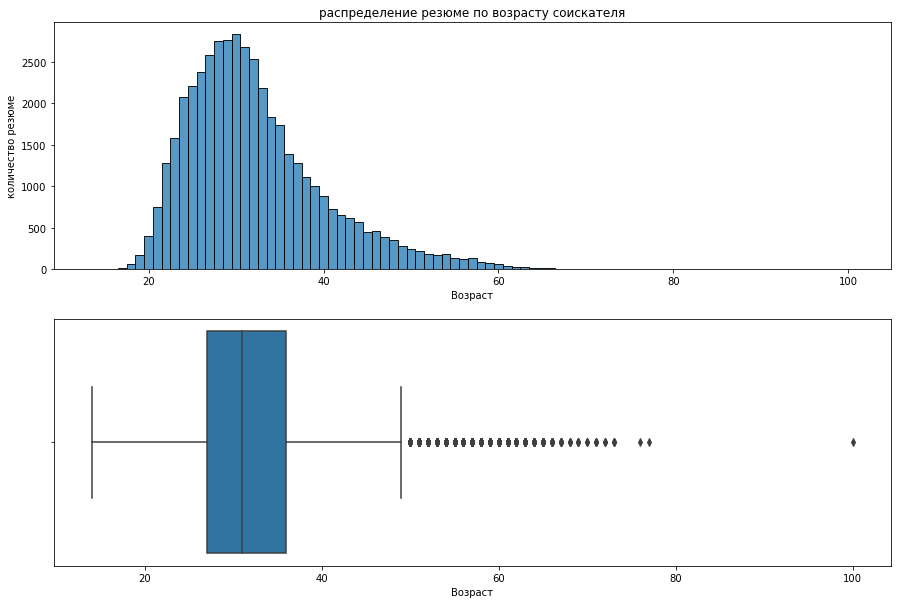

мода: 30
размах: 14 - 100


In [12]:
# ваш код здесь

#Задание 4.1 Чему равно модальное значение возраста соискателей?
print('Задание 4.1:', list(df['Возраст'].mode())[0])

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))

#график 1 - гистограмма по возрасту
fig1 = sns.histplot(
    data=df,
    x='Возраст',
    bins=[i for i in range(df['Возраст'].min(), df['Возраст'].max() + 1)],
    kde=False,
    ax=axes[0],
    discrete=True,
    )

fig1.set(ylabel = "количество резюме")
fig1.set_title('распределение резюме по возрасту соискателя')

#график 2 - коробчатая диаграмма
fig2 = sns.boxplot(
    data=df,
    x='Возраст',
    width=0.9,
    )

plt.show()

#описание
print('мода:', int(df['Возраст'].mode()))
print('размах:', int(df['Возраст'].min()), '-', int(df['Возраст'].max()))

ваши выводы по графику здесь

Модальный возраст соискателей - 30 лет (это лучше и посчитать).
Большинство соискателей - в возрасте от 25 до 45 лет. Совсем мало клиентов старше 50 лет.

В части выбросов:
- для младших возрастов - все ок, аномалий нет (возможно посмотреть на 15-16-летних: если хотят волонтерство/стажировку, то ок)
- для старших возрастов несомненный выброс - 100-летний человек. Для 60+ можно опять же проверить, наколько адекватный желаемый тип занятости они указали. Ну и проверить на неравенство: стаж + 14 лет (минимальный влозраст для труда) <= общий возраст

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

Задание 4.2: 1188


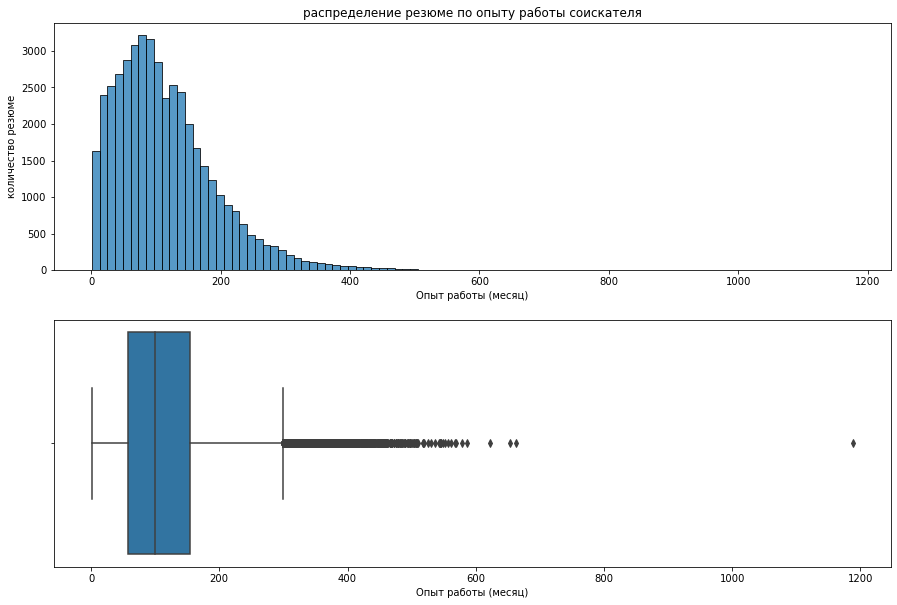

мода: 81
размах: 1 - 1188


In [13]:
# ваш код здесь

#Задание 4.2 Чему равен максимальный опыт работы (в месяцах)?
print('Задание 4.2:', int(df['Опыт работы (месяц)'].max()))

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))

#график 1 - гистограмма по опыту с шагом 12 месяцев - 1 год
fig1 = sns.histplot(
    data=df,
    x='Опыт работы (месяц)',
    bins=[i for i in range(int(df['Опыт работы (месяц)'].min()), int(df['Опыт работы (месяц)'].max() + 1), 12)],
    kde=False,
    ax=axes[0],
    )

fig1.set(ylabel = "количество резюме")
fig1.set_title('распределение резюме по опыту работы соискателя')

#график 2 - коробчатая диаграмма
fig2 = sns.boxplot(
    data=df,
    x='Опыт работы (месяц)',
    width=0.9,
    )

plt.show()

#описание
print('мода:', int(df['Опыт работы (месяц)'].mode()))
print('размах:', int(df['Опыт работы (месяц)'].min()), '-', int(df['Опыт работы (месяц)'].max()))

ваши выводы здесь

Модальное значение - 81 месяц (~8 лет), что при начале работы около 21-22 лет (старшие курсы института) дает моду по возрату 30 лет. Медиана примерно равна моде. Вокруг нее и сконцентрирована основная масса соискателей. Свыше 300 месяцев - 25 лет - опыта соискателей мало.
Выбросы:
- отрицательных стажей нет - уже хорошо
- есть кандидат со стажем работы 100 лет. Это слишком много. Хотя 80 - реально http://www.profi-forex.org/novosti-rossii/entry1008170089.html
- нужно посмотреть на соискателей с 40+ лет стажа. Они могут быть теми же людьми, которые выбиваются и по возрасту

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


Задание 4.3: 5


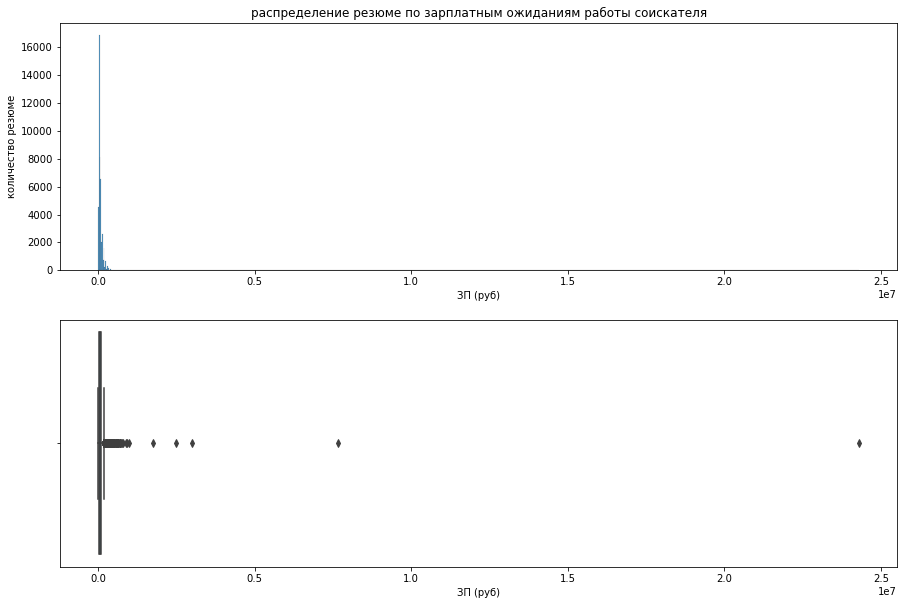

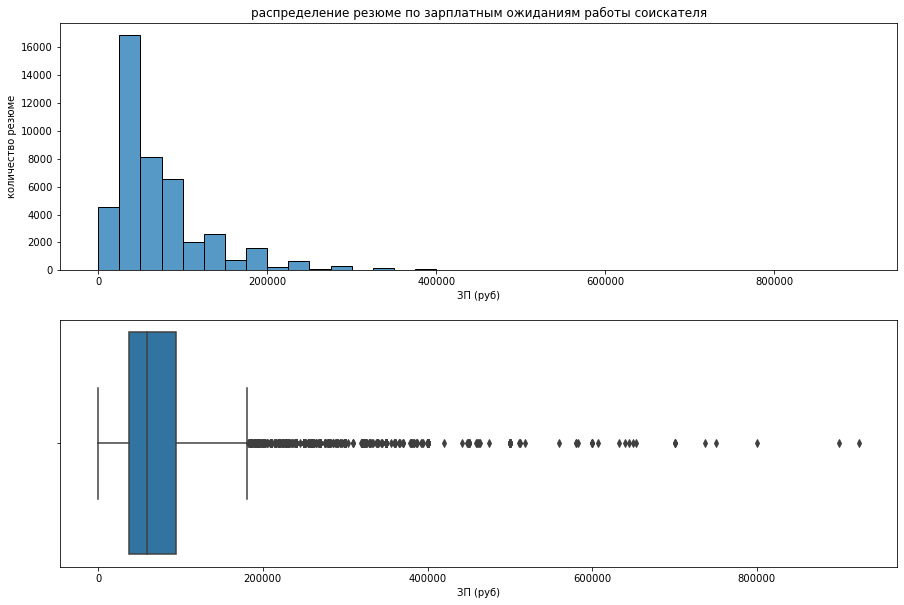

мода: 50000
размах: 1 - 24304876


In [14]:
# ваш код здесь

#Задание 4.3 Определите по графику, сколько соискателей требуют заработную плату выше 1 миллиона рублей.
print('Задание 4.3:', df[df['ЗП (руб)'] > 1000000].shape[0])

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))

#график 1 - гистограмма по опыту с шагом 12 месяцев - 1 год
fig1 = sns.histplot(
    data=df,
    x='ЗП (руб)',
    bins=[i for i in range(int(df['ЗП (руб)'].min()), int(df['ЗП (руб)'].max() + 1), 25000)],
    kde=False,
    ax=axes[0],
    );

fig1.set(ylabel = "количество резюме")
fig1.set_title('распределение резюме по зарплатным ожиданиям работы соискателя')

#график 2 - коробчатая диаграмма
fig2 = sns.boxplot(
    data=df,
    x='ЗП (руб)',
    width=0.9,
    )

plt.show()

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))
#график 1 - гистограмма по опыту с шагом 12 месяцев - 1 год без "миллионников"
#создание базы с зарплатами менее миллиона
df1 = df[df['ЗП (руб)'] < 1000000]
fig1 = sns.histplot(
    data=df1,
    x='ЗП (руб)',
    bins=[i for i in range(int(df1['ЗП (руб)'].min()), int(df1['ЗП (руб)'].max() + 1), 25000)],
    kde=False,
    ax=axes[0],
    )

fig1.set(ylabel="количество резюме")
fig1.set_title('распределение резюме по зарплатным ожиданиям работы соискателя')

#график 2 - коробчатая диаграмма без "миллионников"
fig2 = sns.boxplot(
    data=df1,
    x='ЗП (руб)',
    width=0.9,
    )

plt.show()

#описание
print('мода:', int(df['ЗП (руб)'].mode()))
print('размах:', int(df['ЗП (руб)'].min()), '-', int(df['ЗП (руб)'].max()))

ваши выводы здесь

по заданию: опечатка в ноутбуке - "Есть ли аномалии для признака возраста?". На сайте верно - "Есть ли аномалии для признака заработной платы?"

Так как с экстремальными значениями зарплатных ожиданий ничего не видно, ограничим для второй пары графиков значение зарплаты 1 миллионом рублей.
Средние ожидания зарплаты - около 50 000 руб. БОльшая часть кандидатов ожидают 25-75 тыс. Экстремальные значения - свыше 175 000 руб.

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

Задание 4.4: высшее


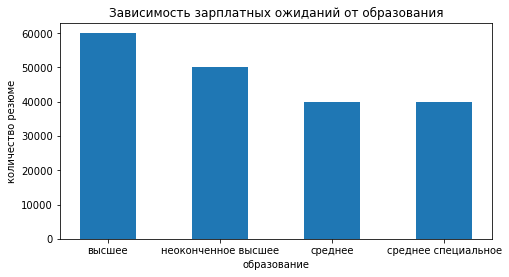

In [15]:
# ваш код здесь

#Задание 4.4 Какая категория образования оплачивается выше всех по медианному показателю?
print('Задание 4.4:', df.groupby(by='Образование').median()['ЗП (руб)'].idxmax())

#таблица для графика - расчет медианного уровня зарплаты по образованию
median_salary_by_educ = df[df['ЗП (руб)'] < 1000000].groupby(by='Образование').median()['ЗП (руб)']

fig = plt.figure(figsize=(6, 3))
axes = fig.add_axes([0, 0, 1, 1])
axes.bar(x = median_salary_by_educ.index, height=median_salary_by_educ, width=0.5);
axes.set_ylabel('количество резюме')
axes.set_xlabel('образование')
axes.set_title('Зависимость зарплатных ожиданий от образования')
plt.show()

ваши выводы здесь

Зависмость зарплатных ожиданий от образования есть: разница в медианном показателее между высшим (самые требовательные кандидаты) и средним/средним специальным (самые нетребовательные кандидаты) составляет 1,5 раза. Неконченное высшее находится посередине между ними.
Значимость переменной есть, но она будет слабее при включении в модель возраста, т.к. возраст может коррелировать с образованием: например, все, у кого среднее образование, просто еще молодые и еще поступят в институт. Естественно, что и запросы у них меньше

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

Задание 4.5: другие


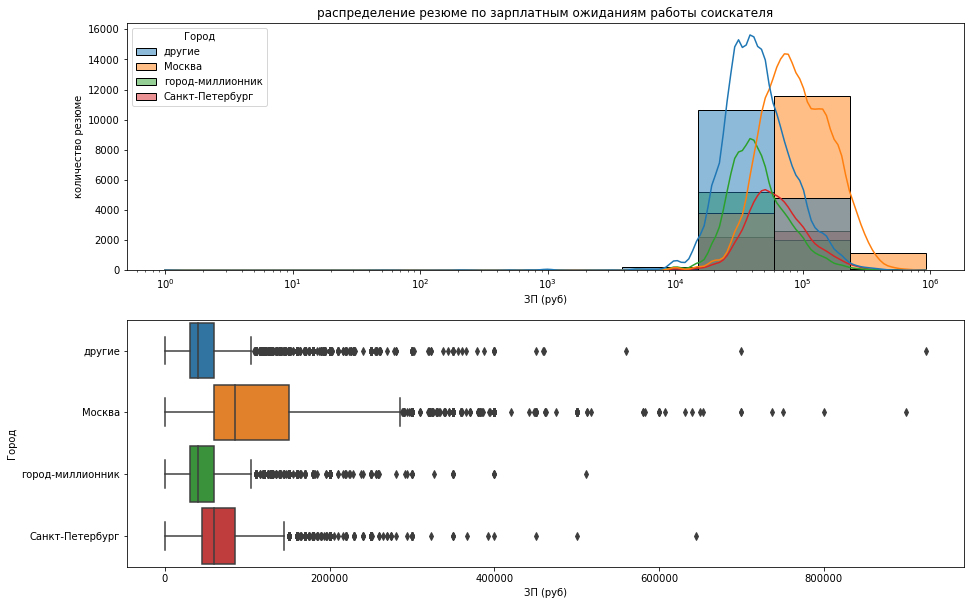

In [16]:
# ваш код здесь

#Задание 4.5 В каком городе (категории городов) зафиксирован наибольший показатель
#желаемой заработной платы (~924 тысячи рублей)?
print('Задание 4.5:', df.groupby(by='Город')['ЗП (руб)'].agg(['max']).idxmax().iloc[0])

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))

#график 1 - гистограмма по зарплате в разных типах городов с лог-шкалой с основанием 10
fig1 = sns.histplot(
    data=df1,
    x='ЗП (руб)',
    bins=10,
    hue='Город',
    kde=True,
    log_scale=10,
    ax=axes[0],
    )

fig1.set(ylabel = "количество резюме")
fig1.set_title('распределение резюме по зарплатным ожиданиям работы соискателя')

#график 2 - коробчатая диаграмма по зарплате в разных типах городов
fig2 = sns.boxplot(
    data=df1,
    x='ЗП (руб)',
    y='Город',
    width=0.9,
    )

plt.show()

ваши выводы здесь

Есть явная зависимость зарплатных запросов от размера города: Наибольшие запросы - в Москве, затем - в Петербурге и городах-миллионниках. Наименьшие запросы - у жителей остальной части страны.
Но все же есть соискатели из провинции с запросами поболее, чем в столице...

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

Задание 4.6: 66


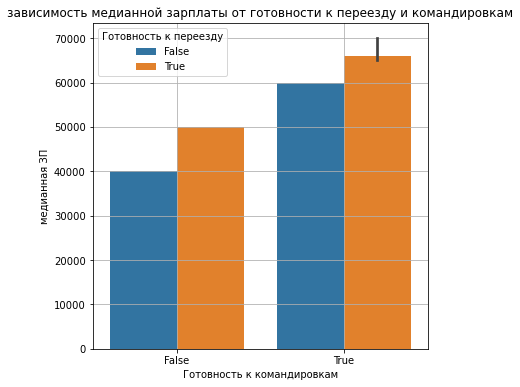

In [17]:
# ваш код здесь
#Задание 4.6 Чему равна желаемая медианная заработная плата соискателей, готовых и к переезду,
#и к командировкам? Ответ приведите в тысячах, округлив до целого (например, 45).
#print('Задание 4.6:', df[df['Готовность к переезду'] == True & df['Готовность к командировкам'] == True].median())

print('Задание 4.6:',
      int(round(df[(df['Готовность к командировкам'] == True)
                   & (df['Готовность к переезду'] == True)]['ЗП (руб)'].median() / 1000, 0)
         )
     )


fig = plt.figure(figsize=(6, 6))

barplot = sns.barplot(
    data=df,
    x='Готовность к командировкам',
    y='ЗП (руб)',
    hue='Готовность к переезду',
    estimator=np.median
    )

barplot.set_title('зависимость медианной зарплаты от готовности к переезду и командировкам')
barplot.set_ylabel('медианная ЗП');
barplot.grid()

ваши выводы здесь

Люди, готовые переезжать, ожидают бОльшую зарплату, чем неготовые, что логично - зачем пееезжать, если на новом месте денег больше не дают, да и сам переезд денег стоит плюс привыкание на новом месте. Повышенные запросы = своеобразная "премия за риск": а вдруг на новом месте не сложится, тогда еще и обратно переезжать.

Люди, готовые к командировкам, тоже хотят получать больше денег, чем те, кто к командировкам не готов. Это уже премия за неконтролируемость свободного времени и компенсация за снижение времени общения с семьей, друзьями - кто знает, насколько и куда зашлют в командировку.

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

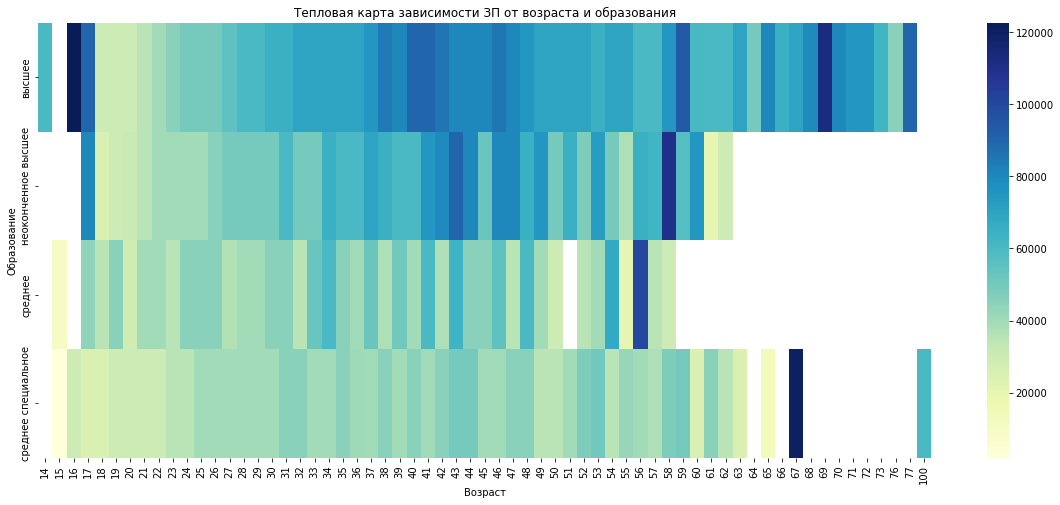

In [18]:
# ваш код здесь
df_pivot_age_educ = df.pivot_table(
    values='ЗП (руб)',
    index='Образование',
    columns='Возраст',
    aggfunc='median'
    )

fig = plt.figure(figsize=(20, 8))
heatmap = sns.heatmap(data=df_pivot_age_educ, cmap='YlGnBu')
heatmap.set_title('Тепловая карта зависимости ЗП от возраста и образования');

ваши выводы здесь

Быстрее всех с возрастом растут требования в ЗП у людей с высшим образованием. Да и, судя по наличию старших возрастов, живут они дольше. По данной тепловой карте налицо выбросы среди молодежи, которые, видимо, лишний нолик приписали - требовать 120000 без опыта работы как-то слишком. Да и как у них высшее образование могло появиться - непонятно. Ну или это родня [Алисы Тепляковой](https://ru.wikipedia.org/wiki/Теплякова,_Алиса_Евгеньевна)

Со средним специальным и средним образованием рост запросов довольно слабый - они редко претендуют на высокие позиции (руководящий состав), а зарпдлата у рядовых сотрудников, тем более по рабочти (не офисным) специальностям не так высока.
В целом чем старше человек, тем более высокий доход он хочет получать, так как профессионализм, а следовательно, и эффективность (производительность) сотрудника растет.

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

Задание 4.8: 7


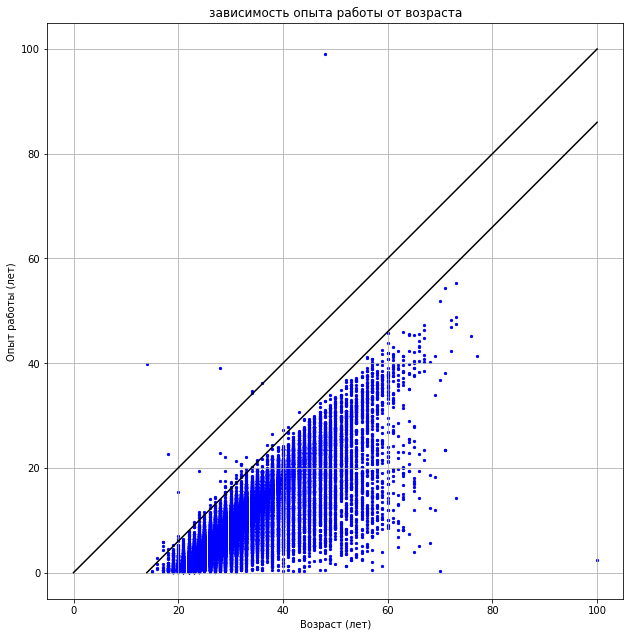

In [19]:
# ваш код здесь
#возраст в годах
df['Опыт работы (годы)'] = df['Опыт работы (месяц)'].apply(lambda x: round(x / 12, 2))

#Задание 4.8 Сколько точек лежат строго выше построенной прямой?
#Так как точки могут сливаться с прямой, то для ответа на этот вопрос проще всего воспользоваться
#интерактивной визуализацией либо получить таблицу с наблюдениями, лежащими выше прямой с помощью фильтрации.
print('Задание 4.8:', df[df['Опыт работы (годы)'] > df['Возраст']].shape[0])

fig = plt.figure(figsize=(8, 8))
axes = fig.add_axes([0, 0, 1, 1])
plt.scatter(
    x=df['Возраст'],
    y=df['Опыт работы (годы)'], 
    s=5,
    marker='o',
    c='blue'
    )

axes.set_title('зависимость опыта работы от возраста')
axes.set_xlabel('Возраст (лет)')
axes.set_ylabel('Опыт работы (лет)')
axes.grid()

#для главной диагонали
x1 = [0, 100]
y1 = [0, 100]
plt.plot(x1, y1, c='black')

#для второй диагонали
diff = 14
x2 = [diff, 100]
y2 = [0, 100 - diff]
plt.plot(x2, y2, c='black')
plt.show()

ваши выводы здесь

По данному графику видно, что в основном стаж равен вохрасту минус некоторая константа (возраст начала трудовой биографии) - под главной диагональю есть практически пустая полоса высотой около 15 лет.

Все, что выше диагонали - однозначные выборосы, т.к. стаж не может быть больше возраста.

Также выбросами являются и точки, которые лежат под главной диагональю над второй диагональю, показывающей максимальный стаж для каждого возраста при условии, что человек начал работать в 14 лет.

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


In [20]:
# ваш код здесь
#удаление добавочных столбцов и таблиц
del df1

df = df.drop('Опыт работы (годы)', axis=1)

ваши выводы здесь

пас

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [21]:
# ваш код здесь
#Задание 5.1 Начнём с дубликатов в наших данных. Найдите полные дубликаты в таблице с резюме и удалите их.
#Сколько полных копий удалось найти?

mask = df.duplicated()
df_dupl = df[mask]
print('Задание 5.1:', df_dupl.shape[0])

df = df.drop_duplicates()
print('Результирующее число записей:', df.shape[0])

Задание 5.1: 161
Результирующее число записей: 44583


2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [22]:
# ваш код здесь

#Задание 5.2 Сколько пропусков в столбце «Опыт работы (месяц)»?
print('Задание 5.2:', df.isnull().sum().loc['Опыт работы (месяц)'])

print(df.isnull().sum())

Задание 5.2: 168
Ищет работу на должность:            0
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Обновление резюме                    0
Авто                                 0
Образование                          0
Пол                                  0
Возраст                              0
Опыт работы (месяц)                168
Город                                0
Готовность к переезду                0
Готовность к командировкам           0
полная занятость                     0
частичная занятость                  0
проектная работа                     0
волонтерство                         0
стажировка                           0
полный день                          0
сменный график                       0
гибкий график                        0
удаленная работа                     0
вахтовый метод                       0
ЗП (руб)                             0
dtype: int64


3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [23]:
# ваш код здесь
df = df.dropna(subset=['Последнее/нынешнее место работы', 'Последняя/нынешняя должность'])

#заполнение опыта медианами
df = df.fillna({'Опыт работы (месяц)': df['Опыт работы (месяц)'].median()})

#Задание 5.3 Чему равно результирующее среднее значение в столбце «Опыт работы (месяц)» после заполнения пропусков?
#Ответ округлите до целых.
print('Задание 5.3:', int(round(df['Опыт работы (месяц)'].mean())))

Задание 5.3: 114


4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [24]:
# ваш код здесь

#Задание 5.4 Сколько выбросов вы нашли?
print('Задание 5.4:', df[(df['ЗП (руб)'] > 1000000) | (df['ЗП (руб)'] < 1000)].shape[0])

#очистка
df = df[(df['ЗП (руб)'] <= 1000000) & (df['ЗП (руб)'] >= 1000)]

Задание 5.4: 89


5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [25]:
# ваш код здесь

#Задание 5.5 Сколько выбросов вы нашли?
print('Задание 5.5:', df[df['Возраст'] < df['Опыт работы (месяц)'] / 12].shape[0])

#очистка
df = df[df['Возраст'] >= df['Опыт работы (месяц)'] / 12]

Задание 5.5: 7


6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

асимметрия: 0.019 вправо


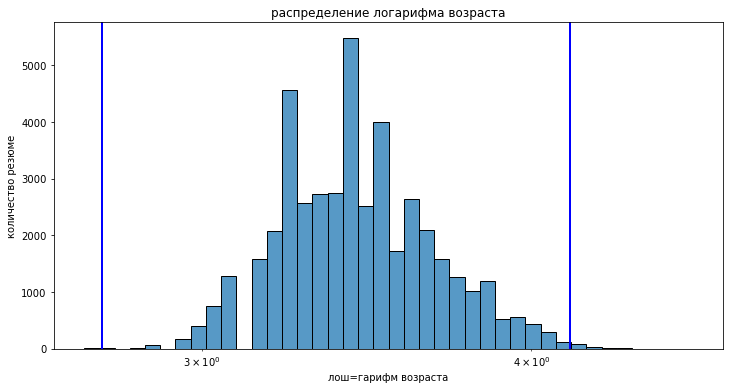

выкинутся люди до 15 включительно и от 100 и старше
Задание 5.6: 3


In [26]:
# ваш код здесь

#логарифм возраста
df['Логарифм возраста'] = df['Возраст'].apply(lambda x: np.log(x))

#асимметрия распределения
print('асимметрия:',
      round(df['Логарифм возраста'].kurtosis(), 3),
      'вправо' if df['Логарифм возраста'].kurtosis() > 0 else 'влево' if df['Логарифм возраста'].kurtosis() > 0 else 'нет'
     )

#график рспределения логарифма возраста
fig = plt.figure(figsize=(12, 6))
fig1 = sns.histplot(
    data=df,
    x='Логарифм возраста',
    bins=40,
    log_scale=10,
    );

fig1.set_ylabel('количество резюме')
fig1.set_xlabel('лош=гарифм возраста')
fig1.set_title('распределение логарифма возраста')

#вертикальные линии для трех сигм
fig1.axvline(df['Логарифм возраста'].mean() + 3 * df['Логарифм возраста'].std(), color='b', lw=2)
fig1.axvline(df['Логарифм возраста'].mean() - 3 * df['Логарифм возраста'].std(), color='b', lw=2)

plt.show()

#функция очистки от выбросов по z-отклонению из задания на занятии про выбросы
def outliers_z_score_mod(data, feature, log_scale=False, left=3, right=3):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

#чистка
outliers, cleaned = outliers_z_score_mod(data=df, feature='Возраст', log_scale=True, left=3, right=4)
#тут решил f-строкой написать в первый и последний раз по проекту
print(f'выкинутся люди до {outliers["Возраст"].min()} включительно и от {outliers["Возраст"].max()} и старше')

#Задание 5.6 Сколько выбросов вы нашли с помощью метода z-отклонений?
print('Задание 5.6:', outliers.shape[0])

ваш коммментарий здесь

Исходное распределение логарифма возраста асимметрично вправо, но очень слабо (коэффициент асимметрии равен 0.019).

Если взять влево 3 сигмы и вправо 4 сигмы, то отсекутся люди 100 лет и до 15 лет включительно, всего 7 человек.